In [16]:
#--- imports for data preprocessing
import pandas as pd
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from google.colab import files
from sklearn.preprocessing import OneHotEncoder

In [17]:
file_url = '/content/drive/MyDrive/data_mining_project/autoscout24_scraped_data.csv'
data = pd.read_csv(file_url)
data

,GUID,Make,Model,Mileage,Price,First Registration,Fuel Type,Seller
0,4b5f723a-8cee-4fcc-9a03-baebe0b75b8a,audi,a4,"182,707 km","€ 4,950.-",09/2008,Gasoline,Autohandel Honing
1,4e9f026d-b6d6-4f1a-8f09-5c8407ea4f68,audi,a4,"273,250 km","€ 8,400.-",06/2013,Diesel,Auto Centrum Bommelerwaard
2,c7609b24-a5e1-4280-9557-9e284f18310d,audi,tt,"137,528 km","€ 7,900.-",04/2008,Gasoline,PGN bvba
3,52623fae-552d-4ea1-8a10-7061ee8d27cb,audi,q3,"4,043 km","€ 39,900.-",06/2024,Gasoline,Yprauto
4,c92ee042-4660-46f4-97f0-77313ba55020,audi,a8,"175,144 km","€ 9,999.-",01/2009,Diesel,Garage des Chaufours SRL
...,...,...,...,...,...,...,...,...
6970,8582b3c3-22d4-4887-8d5c-c44ada9b0c7c,toyota,yaris,"14,910 km","€ 20,495.-",12/2022,Electric/Gasoline,Gego sa
6971,178f3a47-0266-47ac-bbd8-7cf968dcdf25,toyota,aygo x,"3,877 km","€ 17,899.-",06/2023,Gasoline,Van Mossel Opel Mechelen
6972,ffe43899-3a55-406a-941a-0d0244d40742,toyota,yaris,"1,300 km","€ 21,600.-",06/2024,Electric/Gasoline,Duegi Car Srl
6973,3f1cb7b5-22c8-484c-8f7b-286e908e4948,toyota,yaris cross,"30,220 km","€ 23,910.-",04/2022,Electric/Gasoline,Toyota Autohaus J. Reith GmbH


In [18]:
print(f"The length of the whole dataset is: {len(data)}")
print(f"The number of unique rows in the dataset is {len(data['GUID'].unique())}")

The length of the whole dataset is: 6975
The number of unique rows in the dataset is 6682


In [19]:
data = data.drop_duplicates(subset=['GUID'])

In [20]:
print(f"The length of unique GUIDs is {len(data['GUID'].unique())} and the length of the dataframe is {len(data)}.")

The length of unique GUIDs is 6682 and the length of the dataframe is 6682.


In [21]:
data = data.drop(columns=['Seller', 'GUID'])

In [22]:
data = data.rename(columns={'Make':'Brand'})

In [23]:
data

,Brand,Model,Mileage,Price,First Registration,Fuel Type
0,audi,a4,"182,707 km","€ 4,950.-",09/2008,Gasoline
1,audi,a4,"273,250 km","€ 8,400.-",06/2013,Diesel
2,audi,tt,"137,528 km","€ 7,900.-",04/2008,Gasoline
3,audi,q3,"4,043 km","€ 39,900.-",06/2024,Gasoline
4,audi,a8,"175,144 km","€ 9,999.-",01/2009,Diesel
...,...,...,...,...,...,...
6970,toyota,yaris,"14,910 km","€ 20,495.-",12/2022,Electric/Gasoline
6971,toyota,aygo x,"3,877 km","€ 17,899.-",06/2023,Gasoline
6972,toyota,yaris,"1,300 km","€ 21,600.-",06/2024,Electric/Gasoline
6973,toyota,yaris cross,"30,220 km","€ 23,910.-",04/2022,Electric/Gasoline


In [24]:
def remove_km(mileage):
    return mileage[:-2]

data['Mileage'] = data['Mileage'].apply(remove_km)

In [25]:
def remove_e(price):
    return price[2:-2]

data['Price'] = data['Price'].apply(remove_e)

In [26]:
def convert_to_int(value):
  return int(value.replace(',', ''))

data['Price'] = data['Price'].apply(convert_to_int)

In [27]:
def convert_to_int(value):
  if value == '- ':
    return None
  return int(value.replace(',', ''))

data['Mileage'] = data['Mileage'].apply(convert_to_int)

In [28]:
data

,Brand,Model,Mileage,Price,First Registration,Fuel Type
0,audi,a4,182707.0,4950,09/2008,Gasoline
1,audi,a4,273250.0,8400,06/2013,Diesel
2,audi,tt,137528.0,7900,04/2008,Gasoline
3,audi,q3,4043.0,39900,06/2024,Gasoline
4,audi,a8,175144.0,9999,01/2009,Diesel
...,...,...,...,...,...,...
6970,toyota,yaris,14910.0,20495,12/2022,Electric/Gasoline
6971,toyota,aygo x,3877.0,17899,06/2023,Gasoline
6972,toyota,yaris,1300.0,21600,06/2024,Electric/Gasoline
6973,toyota,yaris cross,30220.0,23910,04/2022,Electric/Gasoline


In [29]:
current_year = datetime.now().year
current_month = datetime.now().month

def calculate_age(registration_date):
    try:
        month, year = map(int, registration_date.split('/'))
        age = current_year - year - ((current_month - month) < 0)
        return age
    except (ValueError, AttributeError):
        return None

data['Car Age'] = data['First Registration'].apply(calculate_age)
data = data.drop(columns=['First Registration'])
data

,Brand,Model,Mileage,Price,Fuel Type,Car Age
0,audi,a4,182707.0,4950,Gasoline,16.0
1,audi,a4,273250.0,8400,Diesel,11.0
2,audi,tt,137528.0,7900,Gasoline,16.0
3,audi,q3,4043.0,39900,Gasoline,0.0
4,audi,a8,175144.0,9999,Diesel,15.0
...,...,...,...,...,...,...
6970,toyota,yaris,14910.0,20495,Electric/Gasoline,1.0
6971,toyota,aygo x,3877.0,17899,Gasoline,1.0
6972,toyota,yaris,1300.0,21600,Electric/Gasoline,0.0
6973,toyota,yaris cross,30220.0,23910,Electric/Gasoline,2.0


<Axes: >

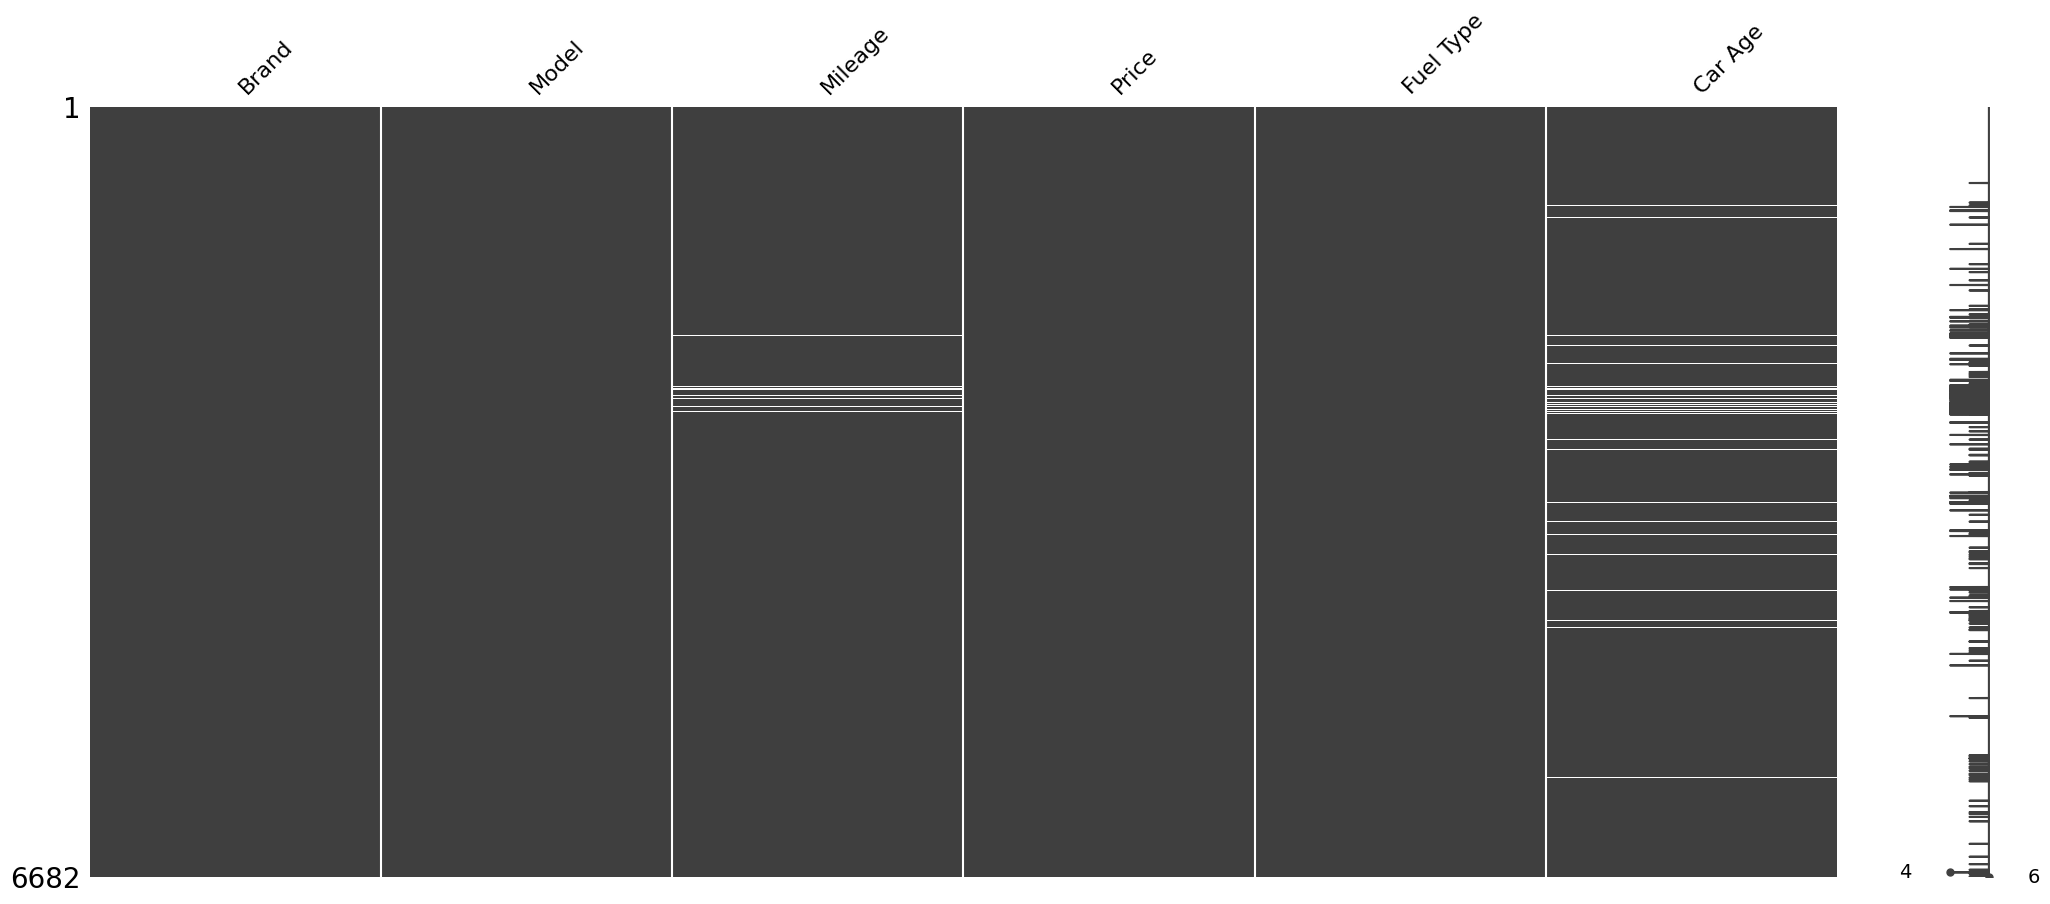

In [30]:
msno.matrix(data)

In [31]:
data['Car Age'].isnull().sum()

281

In [32]:
data=data.dropna(subset=['Car Age'])

<Axes: >

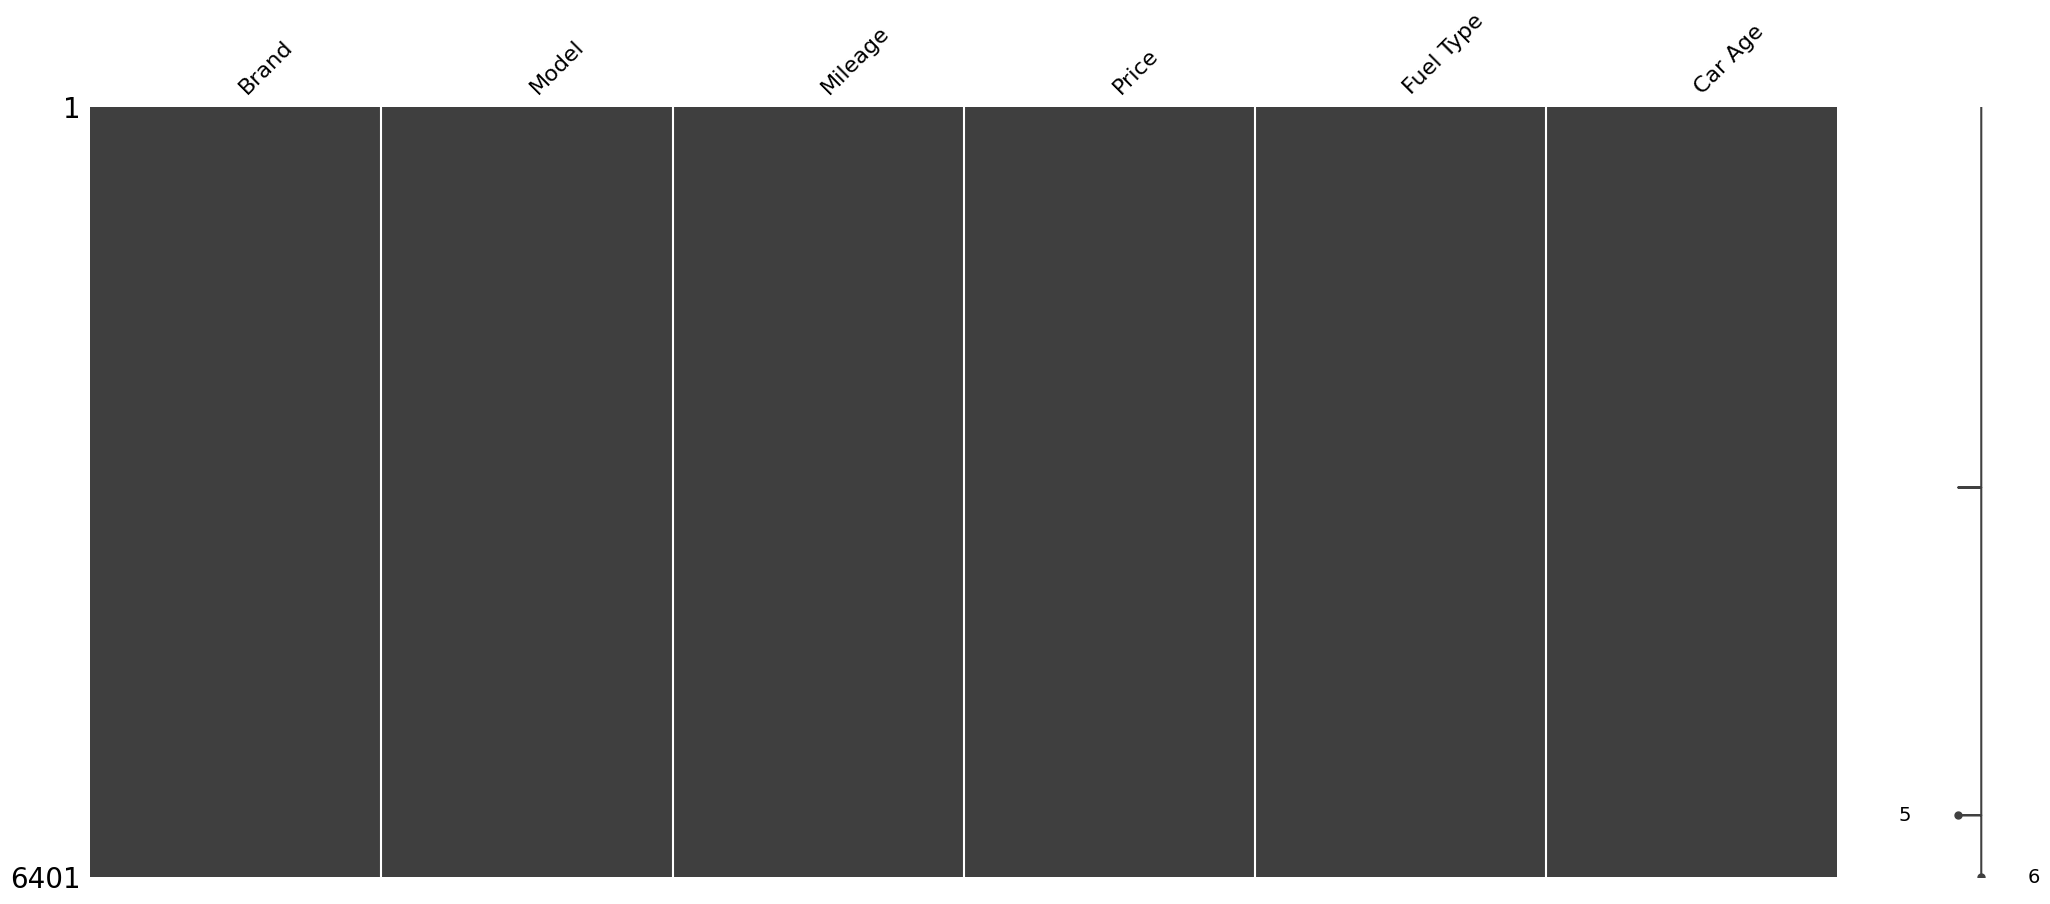

In [33]:
msno.matrix(data)

In [34]:
data['Fuel Type'].unique()

array(['Gasoline', 'Diesel', 'Electric/Gasoline', '- Fuel type', 'Others',
       'Electric', 'Electric/Diesel', 'CNG', 'LPG', 'Hydrogen'],
      dtype=object)

In [35]:
data['Fuel Type'].isin(['Others', '- Fuel type']).sum()

17

In [36]:
data = data[data['Fuel Type'].isin(['- Fuel type', 'Others']) == False]

In [40]:
data['Mileage'].isnull().sum()

2

In [41]:
data = data.dropna(subset=['Mileage'])

In [37]:
fuel_encoder = LabelEncoder()
data['Fuel Type'] = fuel_encoder.fit_transform(data['Fuel Type'])
data

<ipython-input-37-7a7fa898e57e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fuel Type'] = fuel_encoder.fit_transform(data['Fuel Type'])


,Brand,Model,Mileage,Price,Fuel Type,Car Age
0,audi,a4,182707.0,4950,5,16.0
1,audi,a4,273250.0,8400,1,11.0
2,audi,tt,137528.0,7900,5,16.0
3,audi,q3,4043.0,39900,5,0.0
4,audi,a8,175144.0,9999,1,15.0
...,...,...,...,...,...,...
6970,toyota,yaris,14910.0,20495,4,1.0
6971,toyota,aygo x,3877.0,17899,5,1.0
6972,toyota,yaris,1300.0,21600,4,0.0
6973,toyota,yaris cross,30220.0,23910,4,2.0


In [39]:
value_to_number = dict(zip(fuel_encoder.classes_, range(len(fuel_encoder.classes_))))

In [42]:
data.to_csv('/content/drive/MyDrive/data_mining_project/preprocessed.csv', index=False)

In [43]:
files.download('/content/drive/MyDrive/data_mining_project/preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## OneHot Encoding
In this part of the project I am going to use OneHotEncoder model to encode the columns Brand and Model. For the purpose of this project this method I found this method of encoding the values isv most suitable.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data_mining_project/preprocessed.csv')
data

In [ ]:
data = data.drop(columns=['Unnamed: 0'])

In [ ]:
data

In [ ]:
brand_encoder = OneHotEncoder(sparse=False)
brand_encoded = brand_encoder.fit_transform(data[['Brand']])
brand_encoded_df = pd.DataFrame(brand_encoded, columns=brand_encoder.get_feature_names_out(['Brand']))
data_encoded = pd.concat([data.drop(['Brand'], axis=1), brand_encoded_df], axis=1)
data = data_encoded
print(data)

In [ ]:
model_encoder = OneHotEncoder(sparse=False)
model_encoded = model_encoder.fit_transform(data_encoded[['Model']])
model_encoded_df = pd.DataFrame(model_encoded, columns=model_encoder.get_feature_names_out(['Model']))
data_encoded = pd.concat([data_encoded.drop(['Model'], axis=1), model_encoded_df], axis=1)
data = data_encoded

In [ ]:
data

In [ ]:
data.to_csv('/content/drive/MyDrive/data_mining_project/data_encoded.csv')

In [ ]:
files.download('/content/drive/MyDrive/data_mining_project/data_encoded.csv')